In [1]:
import sqlite3 as sql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

In [2]:
#connecting to the DB
try:
    conn = sql.connect('basketball.sqlite')
    print('Opened')
except Exception as e:
    print('Error', str(e))
    

Opened


In [3]:
#setting cursor to variable named c
c = conn.cursor()

In [4]:
#See names of tables
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c.fetchall())

[('Player',), ('Team',), ('Team_Attributes',), ('Team_History',), ('Player_Attributes',), ('Game_Officials',), ('Game_Inactive_Players',), ('Game',)]


In [5]:
# def to_csv():
#     db = sqlite3.connect('database.db')
#     cursor = db.cursor()
#     cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
#     tables = cursor.fetchall()
#     for table_name in tables:
#         table_name = table_name[0]
#         table = pd.read_sql_query("SELECT * from %s" % table_name, db)
#         table.to_csv(table_name + '.csv', index_label='index')
#     cursor.close()
#     db.close()


In [6]:
#exploratory queries for some tables to see their features, using pandas to turn queries into df
game = pd.read_sql_query("SELECT * from GAME", conn)
game.to_csv('Game.csv', index_label='index')

player = pd.read_sql_query("SELECT * from PLAYER", conn)
player.to_csv('Player.csv', index_label='index')

In [7]:
game.head()

,GAME_ID,SEASON_ID,TEAM_ID_HOME,TEAM_ABBREVIATION_HOME,TEAM_NAME_HOME,GAME_DATE,MATCHUP_HOME,WL_HOME,MIN_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,PTS_HOME,PLUS_MINUS_HOME,VIDEO_AVAILABLE_HOME,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,GAME_DATE_AWAY,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,FTM_AWAY,FTA_AWAY,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY,PLUS_MINUS_AWAY,VIDEO_AVAILABLE_AWAY,GAME_DATE_EST,GAME_SEQUENCE,GAME_STATUS_ID,GAME_STATUS_TEXT,GAMECODE,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,LIVE_PERIOD,LIVE_PC_TIME,NATL_TV_BROADCASTER_ABBREVIATION,LIVE_PERIOD_TIME_BCAST,WH_STATUS,TEAM_CITY_HOME,PTS_PAINT_HOME,PTS_2ND_CHANCE_HOME,PTS_FB_HOME,LARGEST_LEAD_HOME,LEAD_CHANGES_HOME,TIMES_TIED_HOME,TEAM_TURNOVERS_HOME,TOTAL_TURNOVERS_HOME,TEAM_REBOUNDS_HOME,PTS_OFF_TO_HOME,TEAM_CITY_AWAY,PTS_PAINT_AWAY,PTS_2ND_CHANCE_AWAY,PTS_FB_AWAY,LARGEST_LEAD_AWAY,LEAD_CHANGES_AWAY,TIMES_TIED_AWAY,TEAM_TURNOVERS_AWAY,TOTAL_TURNOVERS_AWAY,TEAM_REBOUNDS_AWAY,PTS_OFF_TO_AWAY,LEAGUE_ID,GAME_DATE_DAY,ATTENDANCE,GAME_TIME,TEAM_CITY_NAME_HOME,TEAM_NICKNAME_HOME,TEAM_WINS_LOSSES_HOME,PTS_QTR1_HOME,PTS_QTR2_HOME,PTS_QTR3_HOME,PTS_QTR4_HOME,PTS_OT1_HOME,PTS_OT2_HOME,PTS_OT3_HOME,PTS_OT4_HOME,PTS_OT5_HOME,PTS_OT6_HOME,PTS_OT7_HOME,PTS_OT8_HOME,PTS_OT9_HOME,PTS_OT10_HOME,PTS_HOME_y,TEAM_CITY_NAME_AWAY,TEAM_NICKNAME_AWAY,TEAM_WINS_LOSSES_AWAY,PTS_QTR1_AWAY,PTS_QTR2_AWAY,PTS_QTR3_AWAY,PTS_QTR4_AWAY,PTS_OT1_AWAY,PTS_OT2_AWAY,PTS_OT3_AWAY,PTS_OT4_AWAY,PTS_OT5_AWAY,PTS_OT6_AWAY,PTS_OT7_AWAY,PTS_OT8_AWAY,PTS_OT9_AWAY,PTS_OT10_AWAY,LAST_GAME_ID,LAST_GAME_DATE_EST,LAST_GAME_HOME_TEAM_ID,LAST_GAME_HOME_TEAM_CITY,LAST_GAME_HOME_TEAM_NAME,LAST_GAME_HOME_TEAM_ABBREVIATION,LAST_GAME_HOME_TEAM_POINTS,LAST_GAME_VISITOR_TEAM_ID,LAST_GAME_VISITOR_TEAM_CITY,LAST_GAME_VISITOR_TEAM_NAME,LAST_GAME_VISITOR_TEAM_CITY1,LAST_GAME_VISITOR_TEAM_POINTS,HOME_TEAM_WINS,HOME_TEAM_LOSSES,SERIES_LEADER,VIDEO_AVAILABLE_FLAG,PT_AVAILABLE,PT_XYZ_AVAILABLE,HUSTLE_STATUS,HISTORICAL_STATUS
0,0024600001,21946,1610610035,HUS,Toronto Huskies,1946-11-01,HUS vs. NYK,L,0,25.0,None,NaN,None,None,NaN,16.0,29.0,0.552,None,None,None,None,None,None,None,NaN,66,-2,0,1610612752,NYK,New York Knicks,1946-11-01,NYK @ HUS,W,0,24.0,None,NaN,None,None,NaN,20.0,26.0,0.769,None,None,None,None,None,None,None,NaN,68,2,0,1946-11-01T00:00:00,None,3,,19461101/NYKHUS,1610610035,1610612752,1946,5.0,None,None,Q5 -,1.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"FRIDAY, NOVEMBER 1, 1946",None,,Toronto,Huskies,-,None,None,None,None,18,None,None,None,None,None,None,None,None,None,66.0,New York,Knicks,-,None,None,None,None,24,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,3.0,3.0,Tied,0.0,0.0,0.0,0.0,1.0
1,0024600003,21946,1610610034,BOM,St. Louis Bombers,1946-11-02,BOM vs. PIT,W,0,20.0,59.0,0.339,None,None,NaN,16.0,NaN,NaN,None,None,None,None,None,None,None,21.0,56,5,0,1610610031,PIT,Pittsburgh Ironmen,1946-11-02,PIT @ BOM,L,0,16.0,72.0,0.222,None,None,NaN,19.0,NaN,NaN,None,None,None,None,None,None,None,25.0,51,-5,0,1946-11-02T00:00:00,None,3,,19461102/PITBOM,1610610034,1610610031,1946,4.0,None,None,Q4 -,1.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"SATURDAY, NOVEMBER 2, 1946",None,,St. Louis,Bombers,-,16,16,18,6,None,None,None,None,None,None,None,None,None,None,56.0,Pittsburgh,Ironmen,-,5,15,17,14,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,5.0,1.0,St. Louis,0.0,0.0,0.0,0.0,1.0
2,0024600004,21946,1610610025,CHS,Chicago Stags,1946-11-02,CHS vs. NYK,W,0,21.0,None,NaN,None,None,NaN,21.0,NaN,NaN,None,None,None,None,None,None,None,2

In [8]:
player.head()

,id,full_name,first_name,last_name,is_active
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,0
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,0
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,0
3,51,Mahmoud Abdul-Rauf,Mahmoud,Abdul-Rauf,0
4,1505,Tariq Abdul-Wahad,Tariq,Abdul-Wahad,0


In [9]:
c.execute("SELECT * FROM player WHERE last_name = 'James';")
print(c.fetchall())

[('77115', 'Aaron James', 'Aaron', 'James', 0), ('203108', 'Bernard James', 'Bernard', 'James', 0), ('202345', 'Damion James', 'Damion', 'James', 0), ('77116', 'Gene James', 'Gene', 'James', 0), ('1080', 'Henry James', 'Henry', 'James', 0), ('1744', 'Jerome James', 'Jerome', 'James', 0), ('1629713', 'Justin James', 'Justin', 'James', 1), ('2544', 'LeBron James', 'LeBron', 'James', 1), ('2229', 'Mike James', 'Mike', 'James', 0), ('1628455', 'Mike James', 'Mike', 'James', 0), ('1906', 'Tim James', 'Tim', 'James', 0)]


In [10]:
c.execute("SELECT id FROM player WHERE full_name = 'LeBron James'")
print(c.fetchall())

[('2544',)]


In [11]:
playerattributes = pd.read_sql_query("SELECT * FROM player_attributes", conn)
playerattributes.to_csv('PlayerAttributes.csv', index_label='index')
playerattributes

,ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,HEIGHT,WEIGHT,SEASON_EXP,JERSEY,POSITION,ROSTERSTATUS,GAMES_PLAYED_CURRENT_SEASON_FLAG,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,TEAM_CITY,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,PTS,AST,REB,ALL_STAR_APPEARANCES,PIE
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24T00:00:00,Duke,USA,Duke/USA,82.0,240.0,4,30,Forward,Inactive,N,1610612757,Trail Blazers,POR,blazers,Portland,HISTADD_alaa_abdelnaby,1990,1994,N,Y,Y,1990,1,25,5.7,0.3,3.3,0.0,NaN
1,76002,Zaid,Abdul-Aziz,Zaid Abdul-Aziz,"Abdul-Aziz, Zaid",Z. Abdul-Aziz,zaid-abdul-aziz,1946-04-07T00:00:00,Iowa State,USA,Iowa State/USA,81.0,235.0,9,54,Center,Inactive,N,1610612745,Rockets,HOU,rockets,Houston,HISTADD_zaid_abdul-aziz,1968,1977,N,Y,Y,1968,1,5,9.0,1.2,8.0,0.0,NaN
2,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16T00:00:00,UCLA,USA,UCLA/USA,86.0,225.0,19,33,Center,Inactive,N,1610612747,Lakers,LAL,lakers,Los Angeles,HISTADD_kareem_abdul-jabbar,1969,1988,N,Y,Y,1969,1,1,24.6,3.6,11.2,18.0,NaN
3,51,Mahmoud,Abdul-Rauf,Mahmoud Abdul-Rauf,"Abdul-Rauf, Mahmoud",M. Abdul-Rauf,mahmoud-abdul-rauf,1969-03-09T00:00:00,Louisiana State,USA,Louisiana State/USA,73.0,162.0,8,1,Guard,Inactive,N,1610612743,Nuggets,DEN,nuggets,Denver,mahmoud_abdul-rauf,1990,2000,N,Y,Y,1990,1,3,14.6,3.5,1.9,0.0,NaN
4,1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",T. Abdul-Wahad,tariq-abdul-wahad,1974-11-03T00:00:00,San Jose State,France,San Jose State/France,78.0,235.0,6,9,Forward-Guard,Inactive,N,1610612758,Kings,SAC,kings,Sacramento,tariq_abdul-wahad,1997,2003,N,Y,Y,1997,1,11,7.8,1.1,3.3,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,1627790,Ante,Zizic,Ante Zizic,"Zizic, Ante",A. Zizic,ante-zizic,1997-01-04T00:00:00,,Croatia,Darussafaka/Croatia,82.0,266.0,3,41,Center,Inactive,N,1610612739,Cavaliers,CLE,cavaliers,Cleveland,ante_zizic,2017,2019,Y,Y,Y,2016,1,23,6.0,0.6,3.9,0.0,NaN
4496,78647,Jim,Zoet,Jim Zoet,"Zoet, Jim",J. Zoet,jim-zoet,1953-12-30T00:00:00,Kent State,USA,Kent State/USA,85.0,240.0,0,34,Center,Inactive,N,1610612765,Pistons,DET,pistons,Detroit,HISTADD_jim_zoet,1982,1982,N,Y,Y,Undrafted,Undrafted,Undrafted,0.3,0.1,1.1,0.0,NaN
4497,78648,Bill,Zopf,Bill Zopf,"Zopf, Bill",B. Zopf,bill-zopf,1948-06-07T00:00:00,Duquesne,USA,Duquesne/USA,73.0,170.0,0,6,Guard,Inactive,N,1610612749,Bucks,MIL,bucks,Milwaukee,HISTADD_zip_zopf,1970,1970,N,Y,Y,1970,2,33,2.2,1.4,0.9,0.0,NaN
4498,1627826,Ivica,Zubac,Ivica Zubac,"Zubac, Ivica",I. Zubac,ivica-zubac,1997-03-18T00:00:00,Mega Basket,Croatia,Mega Basket/Croatia,84.0,240.0,4,40,Center,Active,Y,1610612746,Clippers,LAC,clippers,LA,ivica_zubac,2016,2020,Y,Y,Y,2016,2,32,8.5,1.1,7.0,NaN,0.126


In [12]:
#Querying the top 10 countries that players originate from in the NBA
countries = pd.read_sql(" \
SELECT \
 country \
,COUNT(country) as count\
FROM player_attributes \
GROUP BY country \
ORDER BY count DESC LIMIT 10", conn)
countries.set_index('COUNTRY', inplace=True)

Text(0, 0.5, 'Count')

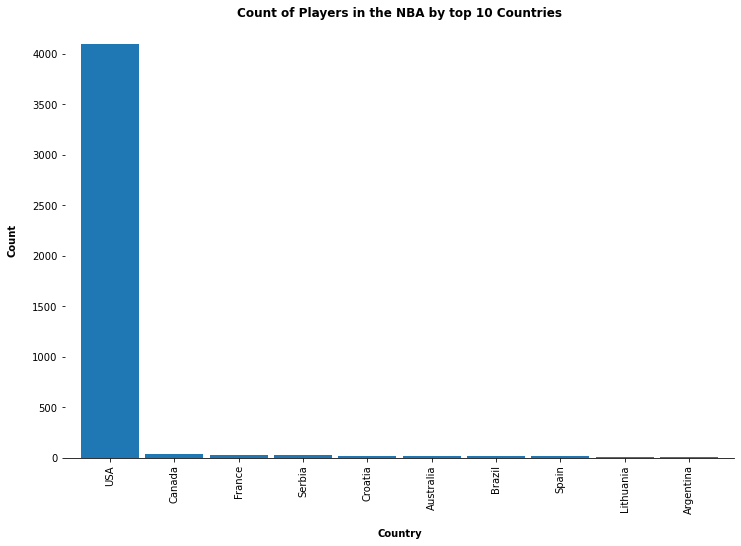

In [13]:
#Plotting previuos query as a bar graph
g = countries.plot(kind='bar', figsize=(12,8), width=0.9, legend=False)
g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)
g.spines['left'].set_visible(False)
g.set_title('Count of Players in the NBA by top 10 Countries', weight='bold')
g.set_xlabel('Country', weight='bold', labelpad=15)
g.set_ylabel('Count', weight='bold', labelpad=15)

In [14]:
#Finding date range for games dataset
dates = c.execute("SELECT min(GAME_DATE), max(GAME_DATE) from GAME")
print(c.fetchall())

[('1946-11-01', '2021-03-24')]


In [30]:
#Finding distinct years in games dataset
pd.read_sql("SELECT distinct(strftime('%Y', GAME_DATE)) as year from GAME", conn)

,year
0,1946
1,1947
2,1948
3,1949
4,1950
...,...
71,2017
72,2018
73,2019
74,2020


In [57]:
#Home win PPG average for Lakers
pd.read_sql(" \
SELECT \
 AVG(pts_home) \
FROM game \
WHERE team_abbreviation_home = 'LAL' \
AND wl_home = 'W'", conn)

,AVG(pts_home)
0,114.239429


In [56]:
#away win PPG average for Lakers
pd.read_sql(" \
SELECT \
 AVG(pts_away) \
FROM game \
WHERE team_abbreviation_away = 'LAL' \
AND wl_away = 'W'", conn)

,AVG(pts_away)
0,111.728856


In [31]:
#Query to find average home win ppg for each team curently active in the league from year 2000
pd.read_sql(" \
SELECT \
 team_abbreviation_home as team \
,ROUND(AVG(pts_home), 2) as 'home_win_ppg' \
FROM game \
WHERE (STRFTIME('%Y', GAME_DATE) >= '2000') \
AND team_abbreviation_home in (SELECT DISTINCT(abbreviation) FROM team) \
AND wl_home = 'W' \
GROUP BY team_abbreviation_home", conn)

,team,home_win_ppg
0,ATL,105.33
1,BKN,110.29
2,BOS,105.59
3,CHA,105.83
4,CHI,102.70
5,CLE,105.43
6,DAL,107.15
7,DEN,110.49
8,DET,103.14
9,GSW,112.56


In [32]:
#Query to find average away win ppg for each team curently active in the league from year 2000
pd.read_sql(" \
SELECT \
 team_abbreviation_away as team \
,ROUND(AVG(pts_away), 2) as 'away_win_ppg' \
FROM game \
WHERE (STRFTIME('%Y', game_date) >= '2000') \
AND team_abbreviation_away in (SELECT DISTINCT(abbreviation) FROM team) \
AND wl_away = 'W' \
GROUP BY team_abbreviation_away", conn)

,team,away_win_ppg
0,ATL,105.02
1,BKN,110.28
2,BOS,104.17
3,CHA,106.04
4,CHI,103.92
5,CLE,105.63
6,DAL,106.00
7,DEN,108.84
8,DET,101.94
9,GSW,111.41


In [40]:
#Average home and away win ppg
pd.read_sql(" \
SELECT \
 home.home_team as team \
,home.home_win_ppg \
,away.away_win_ppg \
,(home.home_win_ppg - away.away_win_ppg) as point_differential \
FROM ( \
    SELECT \
     team_abbreviation_home as home_team \
    ,ROUND(AVG(pts_home),2) as home_win_ppg \
    FROM game \
    WHERE team_abbreviation_home in (SELECT DISTINCT(abbreviation) FROM team) \
    AND wl_home = 'W' \
    GROUP BY team_abbreviation_home) \
AS home \
JOIN ( \
    SELECT \
     team_abbreviation_away as away_team \
    ,ROUND(AVG(pts_away),2) as away_win_ppg \
    FROM game \
    WHERE team_abbreviation_away in (SELECT DISTINCT(abbreviation) FROM team) \
    AND wl_away = 'W' \
    GROUP BY team_abbreviation_away) \
AS away ON home.home_team = away.away_team \
ORDER BY point_differential", conn)

,team,home_win_ppg,away_win_ppg,point_differential
0,CHA,105.83,106.04,-0.21
1,LAC,107.83,107.87,-0.04
2,BKN,110.29,110.28,0.01
3,NOP,114.14,114.12,0.02
4,TOR,105.71,105.21,0.50
5,MIN,105.02,104.48,0.54
6,MEM,103.68,102.92,0.76
7,PHI,104.57,103.65,0.92
8,CHI,107.62,106.70,0.92
9,DAL,108.84,107.88,0.96


In [39]:
#Modifying previous query to only average win PPG over last 20~ years
pd.read_sql(" \
SELECT \
 home.home_team as team \
,home.home_win_ppg \
,away.away_win_ppg \
,(home.home_win_ppg - away.away_win_ppg) as point_differential \
FROM ( \
    SELECT \
     team_abbreviation_home as home_team \
    ,ROUND(AVG(pts_home),2) as home_win_ppg \
    FROM game \
    WHERE (STRFTIME('%Y', game_date) >= '2000') \
    AND team_abbreviation_home in (SELECT DISTINCT(abbreviation) FROM team) \
    AND wl_home = 'W' \
    GROUP BY team_abbreviation_home) \
AS home \
JOIN ( \
    SELECT \
     team_abbreviation_away as away_team \
    ,ROUND(AVG(pts_away),2) as away_win_ppg \
    FROM game \
    WHERE (STRFTIME('%Y', game_date) >= '2000') \
    AND team_abbreviation_away in (SELECT DISTINCT(abbreviation) FROM team) \
    AND wl_away = 'W' \
    GROUP BY team_abbreviation_away) \
AS away ON home.home_team = away.away_team \
ORDER BY point_differential", conn)

,team,home_win_ppg,away_win_ppg,point_differential
0,CHI,102.70,103.92,-1.22
1,LAC,107.28,107.93,-0.65
2,HOU,107.11,107.42,-0.31
3,CHA,105.83,106.04,-0.21
4,CLE,105.43,105.63,-0.20
5,BKN,110.29,110.28,0.01
6,NOP,114.14,114.12,0.02
7,ATL,105.33,105.02,0.31
8,MIL,107.22,106.88,0.34
9,LAL,107.73,107.37,0.36


In [55]:
#Lakers average ppg per season
LALpps = pd.read_sql(" \
SELECT \
 * \
FROM ( \
    SELECT \
     team_abbreviation_home as team \
    ,STRFTIME('%Y', game_date) as year \
    ,ROUND(AVG(pts_home),2) as points_per_season \
    FROM game \
    WHERE team_abbreviation_home in (SELECT abbreviation FROM team) \
    GROUP BY team_abbreviation_home \
    ,STRFTIME('%Y', game_date)) \
WHERE team = 'LAL'", conn)

In [54]:
#Clippers average ppg per season
LACpps = pd.read_sql(" \
SELECT \
 * \
FROM ( \
    SELECT \
     team_abbreviation_home as team \
    ,STRFTIME('%Y', game_date) as year \
    ,ROUND(AVG(pts_home),2) as points_per_season \
    FROM game \
    WHERE team_abbreviation_home in (SELECT abbreviation FROM team) \
    GROUP BY team_abbreviation_home \
    ,STRFTIME('%Y', game_date)) \
WHERE team = 'LAC'", conn)

In [47]:
#Query to pull LAL and LAC average season points and joined over years in which both teams exist
LALLAC = pd.read_sql(" \
SELECT \
 lal.year \
,lal.pps as lal_pps \
,lac.pps as lac_pps \
FROM ( \
    SELECT \
     STRFTIME('%Y', game_date) as year \
    ,ROUND(AVG(pts_home),2) as pps \
    FROM game \
    WHERE team_abbreviation_home = 'LAL' \
    GROUP BY STRFTIME('%Y', game_date)) as lal \
JOIN ( \
    SELECT \
     strftime('%Y', game_date) as year \
    ,ROUND(AVG(pts_home),2) as pps \
    FROM game \
    WHERE team_abbreviation_home = 'LAC' \
    GROUP BY STRFTIME('%Y', game_date)) as lac \
ON lal.year = lac.year", conn)

#Setting index of Df as year
LALLAC.set_index(['year'], inplace=True)
LALLAC

,lal_pps,lac_pps
year,,
1984,117.60,105.72
1985,122.33,109.93
1986,120.32,107.75
1987,120.39,102.44
1988,115.92,103.82
1989,118.41,109.44
1990,114.31,102.20
1991,106.05,103.50
1992,104.17,107.35


In [52]:
LALpps.set_index('year', inplace=True)
LALpps.drop(['team'], axis=1, inplace=True)

In [56]:
LACpps.set_index('year', inplace=True)
LACpps.drop(['team'], axis=1, inplace=True)

<AxesSubplot:title={'center':'Lakers Average Points per Season'}, ylabel='AVERAGE POINTS PER SEASON'>

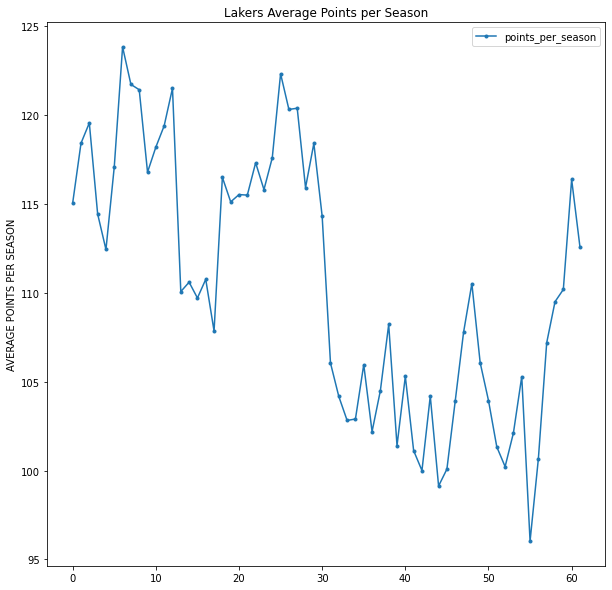

In [57]:
LALpps.plot(title='Lakers Average Points per Season', kind='line',style='.-', figsize=(10,10), ylabel='AVERAGE POINTS PER SEASON')

<AxesSubplot:title={'center':'Clippers Average Points per Season'}, xlabel='year', ylabel='AVERAGE POINTS PER SEASON'>

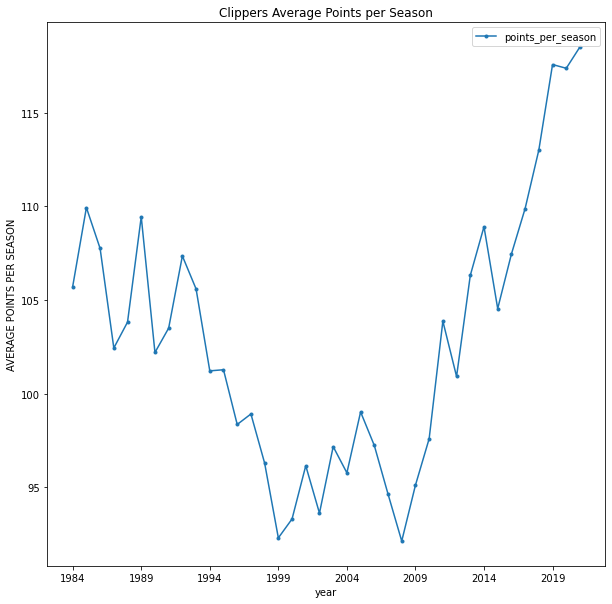

In [58]:
LACpps.plot(title='Clippers Average Points per Season', kind='line',style='.-', figsize=(10,10), ylabel='AVERAGE POINTS PER SEASON')

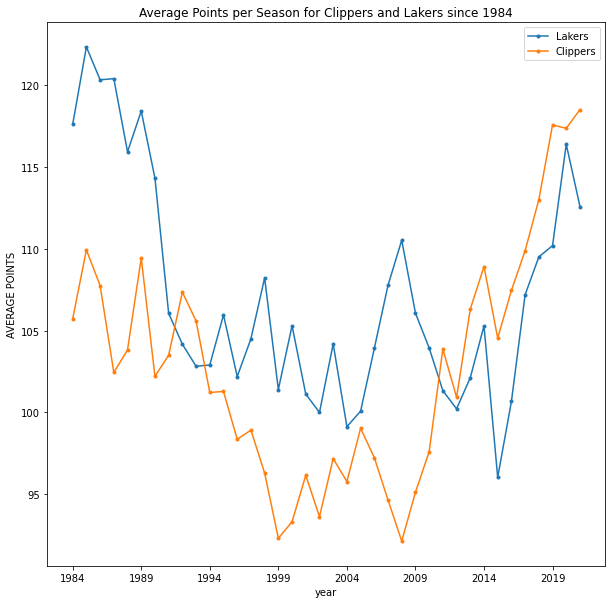

In [59]:
LALLAC.plot(kind='line', style='.-', figsize=(10,10), title='Average Points per Season for Clippers and Lakers since 1984', ylabel='AVERAGE POINTS')
plt.legend(['Lakers', 'Clippers'])

In [30]:
#close connection
c.close()